# Data Set Visualization Preview
The dataset appears to represent car evaluations, where each row describes a car's attributes and its acceptability (the target variable). This data set is sourced from the UCI Machine Learning Repository, which was derived from a hierarchical decision model for car evaluation. The purpose of the dataset is to classify cars into categories like "unacceptable," "acceptable," "good," or "very good" based on their features.

# Database Used

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Read the CSV with column names 
car = pd.read_csv("car.csv", header=None, names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])

# Select specific columns 
selected_columns = car[['buying', 'safety', 'persons']]

# Display the first 10 rows of selected columns
display(selected_columns.head(10))

,buying,safety,persons
0,vhigh,low,2
1,vhigh,med,2
2,vhigh,high,2
3,vhigh,low,2
4,vhigh,med,2
5,vhigh,high,2
6,vhigh,low,2
7,vhigh,med,2
8,vhigh,high,2
9,vhigh,low,4


# Bar Graph

<Figure size 1000x600 with 0 Axes>

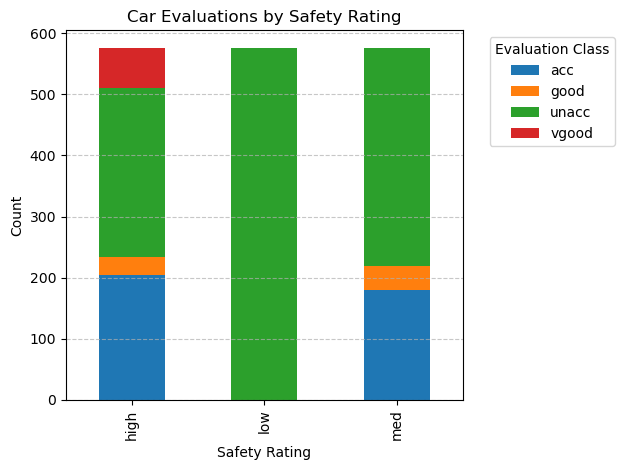

In [110]:
# ---------------------------
# Visualization 1: Bar Graph of Car Evaluations by Safety Rating
# ---------------------------

# Group data by safety rating and evaulation class
safety_class_counts = car.groupby(['safety', 'class']).size().unstack()

plt.figure(figsize=(10, 6))
safety_class_counts.plot(kind='bar', stacked=True)

# Label for X and Y
plt.xlabel('Safety Rating')
plt.ylabel('Count')

# Title
plt.title('Car Evaluations by Safety Rating')
plt.legend(title='Evaluation Class', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save Visualization
plt.savefig("Jamie_SafetyClassBar.png")
plt.show()

## Interpretation of Car Evaluations by Safety Rating

This stacked bar graph visualizes the relationship between a car's safety rating (low, medium, high) and its evaluation class (unacceptable, acceptable, good, very good).

Cars that are considered "very good" are exclusively in the high safety rating.
Cars that are considered "unacceptable" are exclusively in the low safety rating.
Cars that are considered "good" are found only in the high and medium safety rating.


# Line Graph

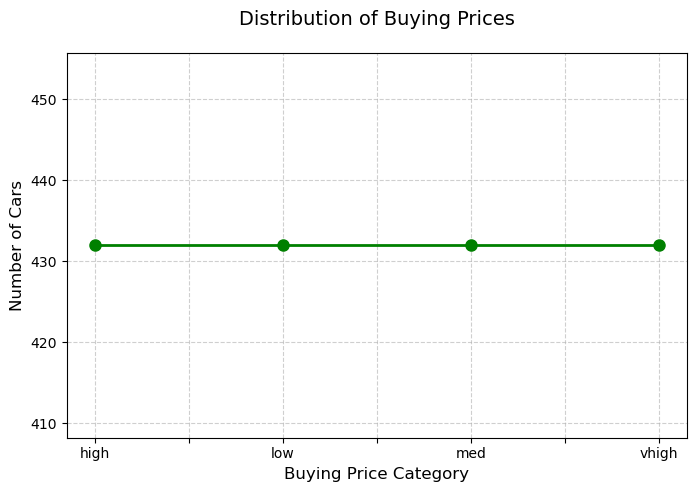

In [113]:
# ---------------------------
# Visualization 2: Line Graph of Buying Price
# ---------------------------

# Count the number of cars at each buying price
buying_counts = car['buying'].value_counts().sort_index()

plt.figure(figsize=(8, 5))

# Plot line graph with a marker at each point
buying_counts.plot(kind='line', marker='o', color='green', markersize=8, linewidth=2)

# Labels for X and Y
plt.xlabel("Buying Price Category", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)

# Title
plt.title('Distribution of Buying Prices', fontsize=14, pad=20)
plt.grid(linestyle='--', alpha=0.6)
plt.xticks(rotation=0) 

# Save the Visualization
plt.savefig("Jamie_BuyingPriceDistribution.png", dpi=300, bbox_inches='tight')
plt.show()

# Explanation and Insights

This line graph displays the count of cars in each buying price category (vhigh, high, med, low), showing how car prices are distributed in the dataset.

While the graph might look strange as its a perfect line, the data has all price categories containing exactly 432 cars each. This implies that this dataset is artifical and not proerply balanced. A dataset containing real data would show more variation. 

# Pie Chart

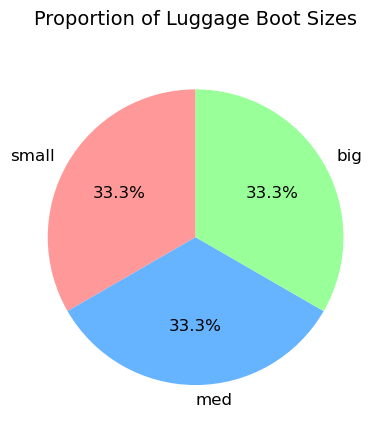

In [72]:
# ---------------------------
# Visualization 3: Pie Chart of Luggage Boot Sizes
# ---------------------------

# Count occurrences of each luggage boot size category
lug_boot_dist = car['lug_boot'].value_counts()

# Plot pie chart
lug_boot_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, colors=['#ff9999','#66b3ff','#99ff99'])

# Title
plt.title('Proportion of Luggage Boot Sizes', fontsize=14, pad=20)
plt.ylabel('')

plt.savefig("Jamie_LuggageBootChart.png", dpi=300, bbox_inches='tight')
plt.show()

# Interpretation and Purpose

This pie chart provides a visualization of the proportion of cars with small, medium, and large luggage compartments in the dataset.

Once again, because of the artifical data, there is a perfect balance for all luggage sizes. This matches the pattern of the equally balanced car number for each price category. As stated previously, if this was real data, the dataset would show more variation. 

# Box Chart

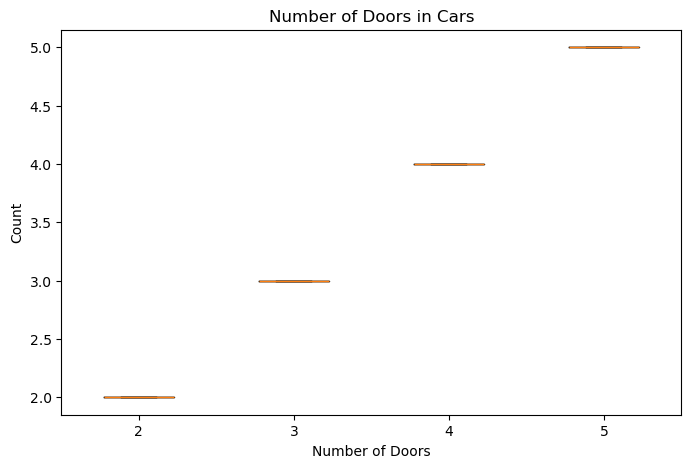

In [132]:
# ---------------------------
# Visualization 4: Box Chart of the Number of Car Doors
# ---------------------------

# Need to convert the door data into a numeric value as the data has cars that have over 4 doors as "5more"
car['doors'] = car['doors'].replace({'5more': 5}).astype(int)

# Prepare data for box plot
door_counts = sorted(car['doors'].unique())
data = [car[car['doors'] == d]['doors'] for d in door_counts]

# Plot box chart
plt.figure(figsize=(8, 5))
plt.boxplot(data, tick_labels=door_counts)

# Title
plt.title("Number of Doors in Cars", fontsize=12)
plt.xlabel("Number of Doors")
plt.ylabel("Count")

plt.savefig("Jamie_NumberOfDoors.png")
plt.show()

# Interpretation and Purpose

This box chart displays the distribution of door counts (2, 3, 4, and 5+ doors) across all cars in the dataset.

From this data we can see that a 2-door car will have exactly 2 doors, a 3-door car will have exactly 3 doors, and so on. This data does not provide actual insight into whether real-world cars tend to have a certain number of doors over others. Because of the artificial data, each door category was purposefully assigned equal representation. 